# Part 1
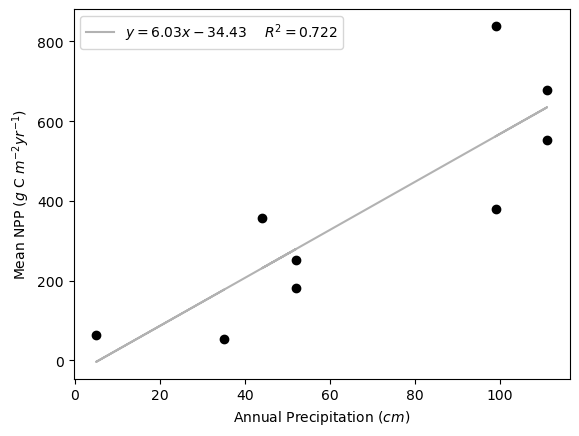\
**Fig. 1** Scatter plot and linear regression of mean NPP (net primary productivity in grams of carbon per square meter per year) as a function of annual precipitation (in centimeters). An R squared value of approximately 0.722 was calculated for this regression. This indicates that about 72% of the variance in mean NPP is related to annual precipitation.

| Regression Variable | Equation | R squared |
| ------------------- | -------- | --------- |
| Annual Precipitation (cm) | 6.03x - 34.43 |0.721851 |
| Mean Annual Temperature (C) | 16.30x + 294.72 | 0.254830 |
| Ratio of Foliar Carbon to Nitrogen | -6.20x + 566.43 | 0.149004 |

**Table 1** All variables used in linear regression models of mean NPP, linear regression equations, and R squared values. Equations are functions of the corresponding regression variable. Annual precipitation resulted in the highest R squared value, indicating the greatest correlation to variance in mean NPP. Mean Annual Temperature and Ratio of Foliar Carbon to Nitrogen both resulted in much lower R squared values (differences of about 47% and 57% respectively). Given that Mean Annual Temperature and Ratio of Foliar Carbon to Nitrogen both have low R squared values, it is unlikely that these variables significantly affect mean NPP.

# Part 2
$NPP = 6.03*x-34.4 = 6.03*65-34.4 = 357.4$ $g$ $m^{-2}$ $yr^{-1}$

$Carbon Stored = NPP * Area * dt = 357.4$ $g$ $m^{-2}$ $yr^{-1}*400*10^6$ $m^2*10$ $yr = 1.429$ $Tg$

The total amount of carbon stored in 10 years over a 400 square km area is **1.429 Tg**.

The result of this calculation would change as the amounts of precipitation are altered. A decrease in the predicted amount of carbon stored may occur in a drier climate. Alternatively, an increase in the predicted amount of carbon stored may occur in a wetter climate. Potential disturbances to biomass at the surface, such as a forest fire, may cause a result that is not represented by this model. In this example, a forest fire would result in die-off of plants which would otherwise contribute to storing carbon.

Two addition variables that could contribute to the model may include Incoming Solar Radiation and Soil Moisture I would expect that changes in solar radiation would alter the productivity of plants, since solar energy is necessary for photosynthesis. Soil Moisture could more accurately reflect NPP than precipitation. I predict this is because precipitation could be falling in the form of snow, which would not immediately provide water for plants.

# Code for Generating Figures

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [6]:
# Read in data
df = pd.read_csv('Ecosystem_NPP.csv')

,Site,Vegetation,MeanNPPobs_gCm−2yr−1,Precipitation_cm,MAT_C,C:N
0,Mid-west Agricultrual,Corn,839,99,11.23,10
1,Mid-west Agricultrual,Soybean,379,99,11.23,11
2,Temperate Forest,Deciduous Forest,679,111,8.31,24
3,Temperate Forest,Conifer Forest,552,111,8.31,37
4,Temperate Conifer,Conifer Forest,356,44,7.75,40
5,Boreal Forest,Upland Black Spruce,251,52,-3.20,60
6,Boreal Forest,Open Black Spruce,181,52,-3.20,50
7,Arctic Plain,Grassland,64,5,-10.91,25
8,Desert grassland,Grassland,54,35,13.57,24


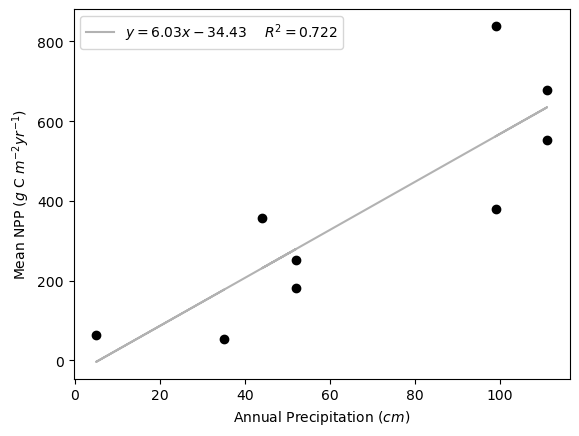

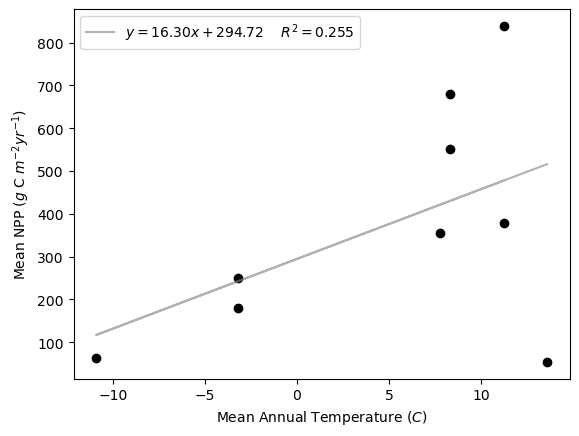

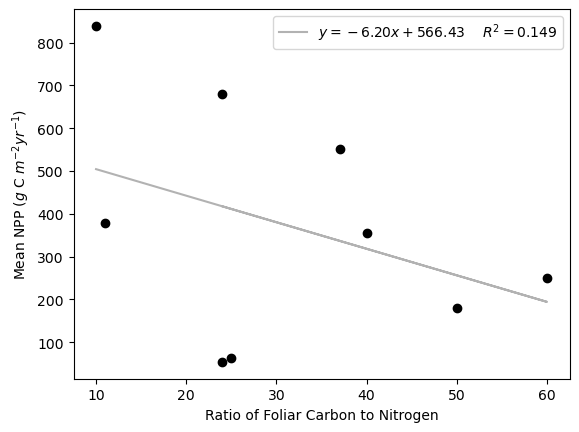

In [38]:
NPP_col = 'MeanNPPobs_gCm−2yr−1'

best_coef = 0;
best_intcpt = 0;
best_r2 = 0;
best_var = '';
target_col = ('Precipitation_cm','MAT_C','C:N ')
y_label = 'Mean NPP ($g$ C $m^{-2} yr^{-1}$)'
x_labels = ('Annual Precipitation ($cm$)', 'Mean Annual Temperature ($C$)', 'Ratio of Foliar Carbon to Nitrogen')

i = 0
for col in target_col:
    model = LinearRegression()
    # Convert to numpy format and reshape into different dimension for fit function
    x=df[col].values.reshape(-1,1) 
    y=df[NPP_col].values.reshape(-1,1)
    # Run the model
    model.fit(x,y)
    y_model = model.predict(x)
    r2 = model.score(x,y)
    
    # Format the equation for the legend
    lbl=''
    if model.intercept_ > 0:
        lbl = '$y={coef:.2f}x+{intcpt:.2f}$    $R^2={r2:.3f}$'
    else:
        lbl = '$y={coef:.2f}x{intcpt:.2f}$    $R^2={r2:.3f}$'
    
    # Plot this variable
    plt.scatter(x,y,color='black')
    plt.plot(x,y_model,color='grey',alpha=0.6,label=lbl.format(coef = model.coef_[0][0], intcpt=model.intercept_[0],r2=r2))
    plt.xlabel(x_labels[i])
    plt.ylabel(y_label)
    plt.legend()
    plt.show()
    
    # Check if this is the best fitting model so far
    if r2 > best_r2:
        best_r2=r2
        best_coef = model.coef_
        best_intcpt = model.intercept_
        best_var = col

    i+=1

In [10]:
# Function for best fitting regression.
# NPP g C m^-2 y^-1
def reg_func(x):
    return best_coef*x+best_intcpt

In [37]:
# Print info about the best fitting model
print(best_var)
print(best_coef)
print(best_intcpt)

Precipitation_cm
[[6.02777725]]
[-34.43206332]


In [12]:
# PART 2: 
# Calculate carbon storage using the best fitting model
land_area = 400 * 10**6 #km^2 converted to m^2
years = 10
mean_precip = 65 # Best fit was determined to be precip model
reg_func(mean_precip) * land_area * years * 10 **-12 # teragrams of carbon

array([[1.42949383]])